In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_ori = train.copy()
test_ori = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#normalize can be set to True to print proportions instead of number
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

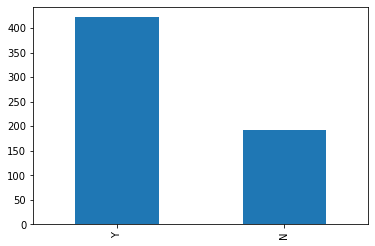

In [10]:
train["Loan_Status"].value_counts().plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

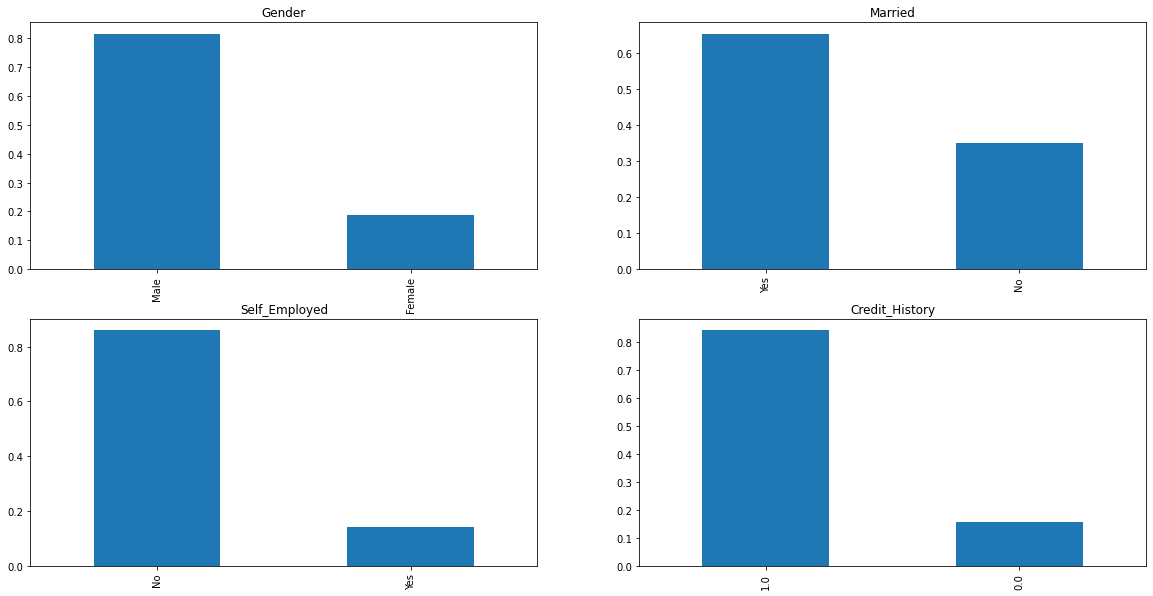

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

<AxesSubplot:title={'center':'Property_Area'}>

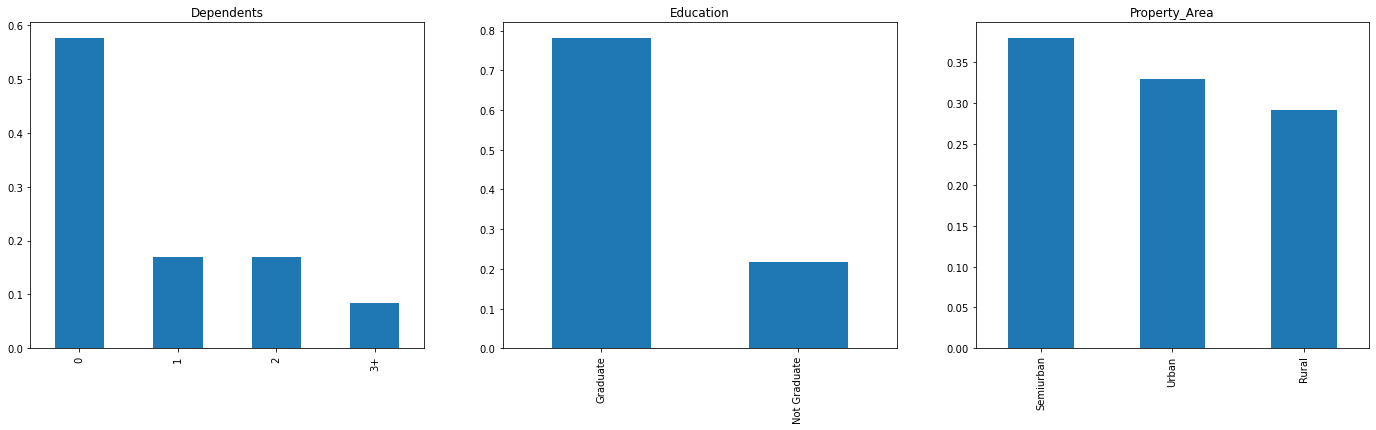

In [12]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')

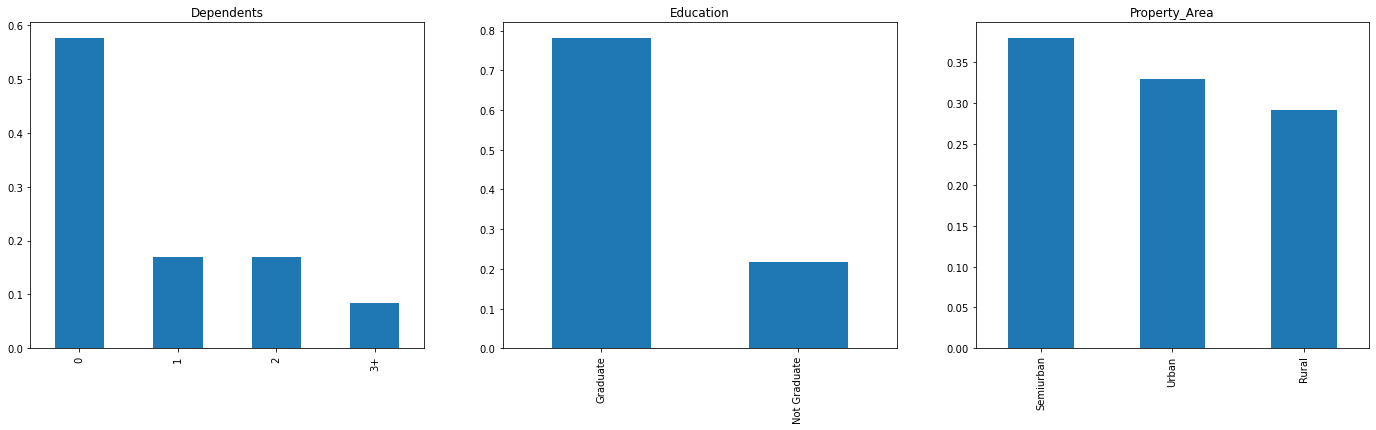

In [13]:
cols = ['Dependents', 'Education', 'Property_Area']
fig, axs = plt.subplots(1, 3, figsize=(24,6))

for i, col in enumerate(cols):
    train[col].value_counts(normalize=True).plot.bar(title=col, ax=axs[i])

plt.show()

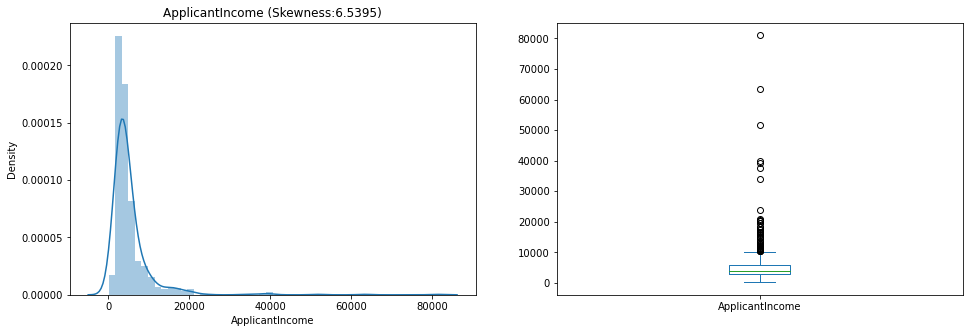

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.title(f"ApplicantIncome (Skewness:{train['ApplicantIncome'].skew().round(4)})")
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

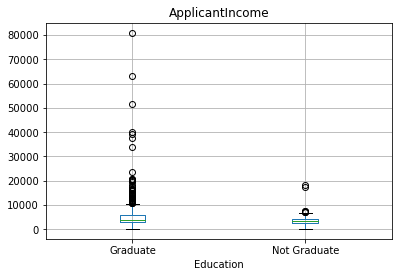

In [15]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

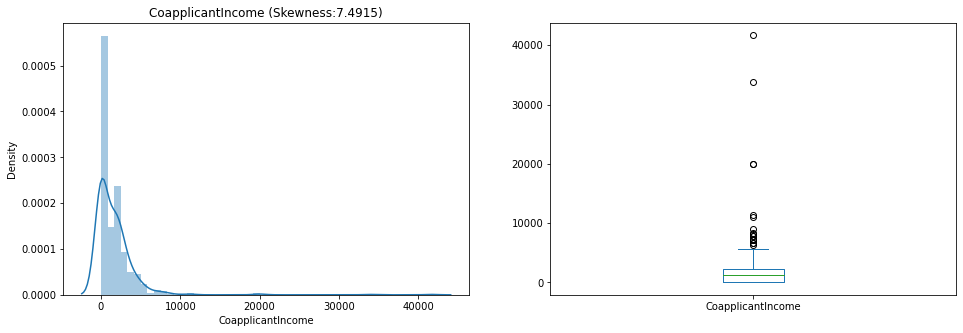

In [16]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.title(f"CoapplicantIncome (Skewness:{train['CoapplicantIncome'].skew().round(4)})")
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

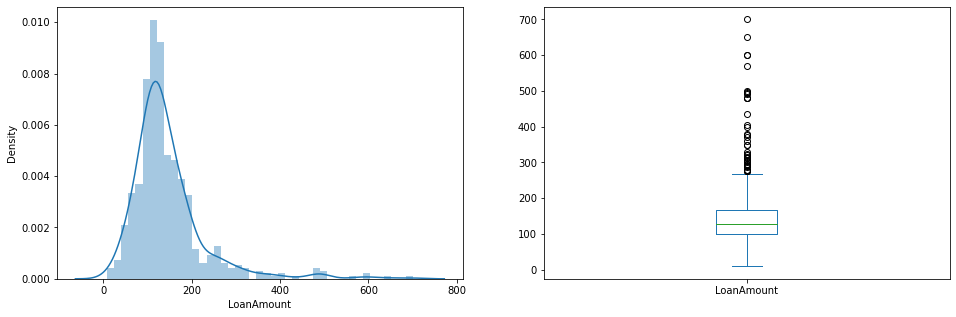

In [17]:
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

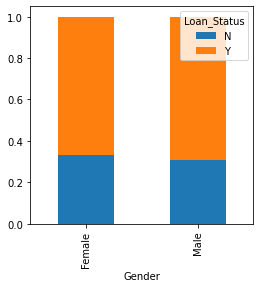

In [18]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

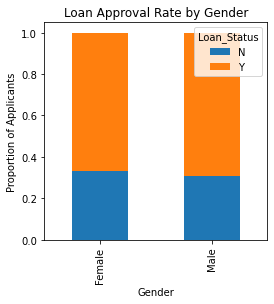

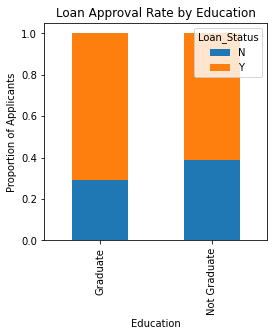

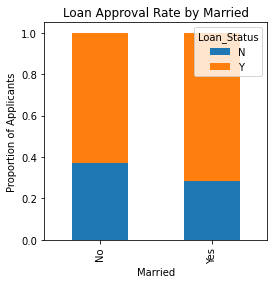

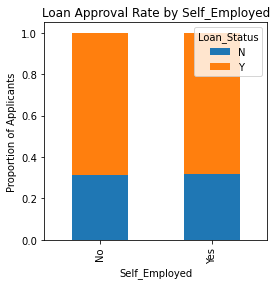

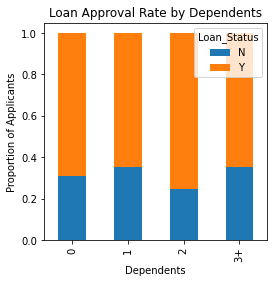

In [19]:
# Define the list of variables you want to plot
variables = ['Gender', 'Education', 'Married', 'Self_Employed','Dependents']

# Loop through each variable and plot the crosstab
for variable in variables:
    ct = pd.crosstab(train[variable], train['Loan_Status'])
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
    plt.title('Loan Approval Rate by {}'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('Proportion of Applicants')
    plt.show()

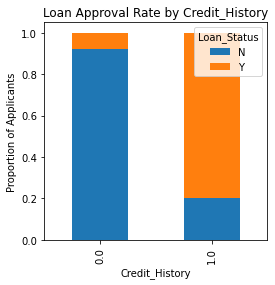

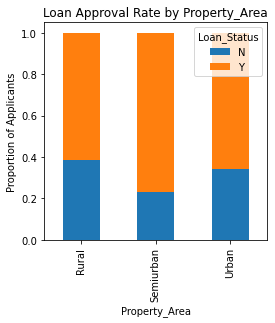

In [20]:
# Define the list of variables you want to plot
variables = ['Credit_History','Property_Area']

# Loop through each variable and plot the crosstab
for variable in variables:
    ct = pd.crosstab(train[variable], train['Loan_Status'])
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
    plt.title('Loan Approval Rate by {}'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('Proportion of Applicants')
    plt.show()

<AxesSubplot:xlabel='Loan_Status'>

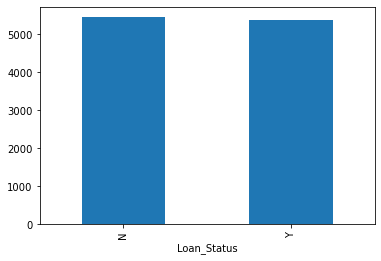

In [21]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [22]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Text(0, 0.5, 'Percentage')

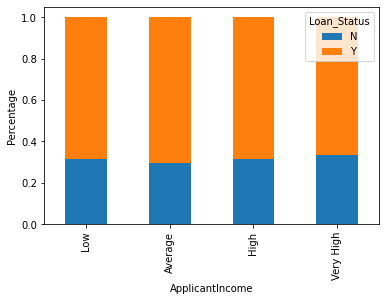

In [23]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

In [24]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

Text(0, 0.5, 'Percentage')

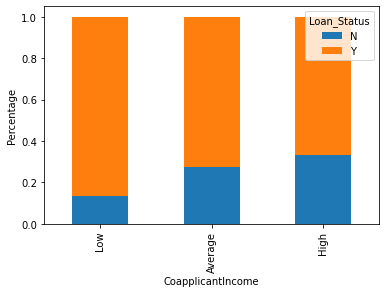

In [25]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

In [26]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

Text(0, 0.5, 'Percentage')

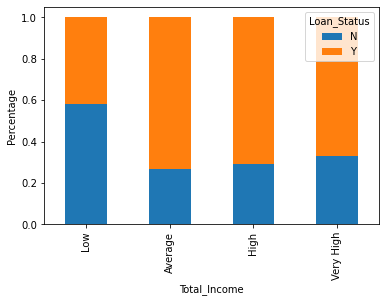

In [27]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin =pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

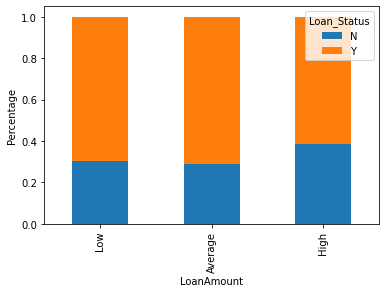

In [28]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin =pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')